In [13]:
#%run test_Orbits.py

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csgwsim.Constants as const

from csgwsim.ORF import transfer_Dslr as Tslr
from csgwsim.Orbit import get_pos
from csgwsim.Waveform import SGWB

In [17]:
Tobs = const.DAYSID_SI*5 #const.YRSID_SI
dt = 1
df = 1/Tobs
fmax = 1/(2*dt)

Nsample = int(Tobs/dt)

#freq = np.arange(1,Nsample+1) * df
tf = np.arange(1, Nsample+1, dtype=np.double) * dt

freq = 10**np.linspace(-4,0,101)

def Sh(freq):
    Amp = 1e-9
    return Amp*freq**3

In [18]:
Nsample

430820

In [21]:
Npix = 192

sigma = np.sqrt(0.5*Sh(freq)/Npix)

hf = np.array([np.random.normal(0, sig, Npix) for sig in sigma])

amp = np.abs(hf)

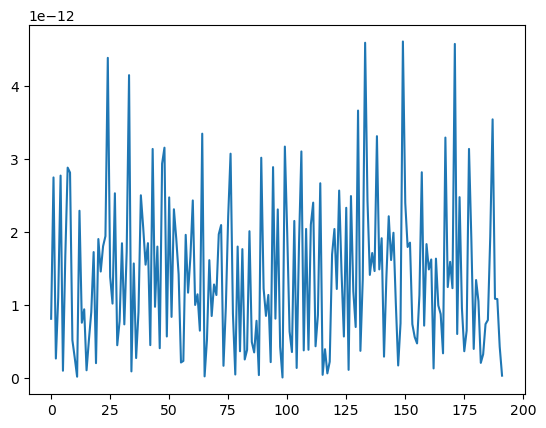

In [24]:
plt.plot(amp[0])

In [20]:
hf.shape

(101, 192)

In [25]:
theta,phi = np.load("../csgwsim/theta_phi_4pix_192.npy")
lambd, beta = phi, np.pi/2-theta

In [29]:
Dslr_td = {}
zeta_l_td = {}

for i, ll, bb in zip(range(192), lambd, beta):
    for j, f in enumerate(freq[:2]):
        Dslr_td[(i,j)], zeta_l_td[(i,j)] = Tslr(tf, f, ll, bb)

KeyboardInterrupt: 

array([1., 1.])

In [55]:
def h(t, amp, f0):
    phi0 = np.random.uniform(0,2*np.pi)
    return amp*np.cos(2*np.pi*f0 *t + phi0)

def generate_amp(f, Sh_f):
    

In [70]:
lambd, beta = 0.3, 0.4

Tobs = const.DAYSID_SI*30 #const.YRSID_SI
dt = 1
df = 1/Tobs
fmax = 1/(2*dt)

Nsample = int(Tobs/dt)

freq = np.arange(1,Nsample+1) * df
tf = np.arange(1, Nsample+1, dtype=np.double) * dt

In [71]:
# for time and freq
yslr_td = Tslr(tf, 0.01, lambd, beta)

In [72]:
#plt.plot(tf, yslr[(1,2)].real)
yslr_td[(1,2)].shape, tf.shape

((2584922,), (2584922,))

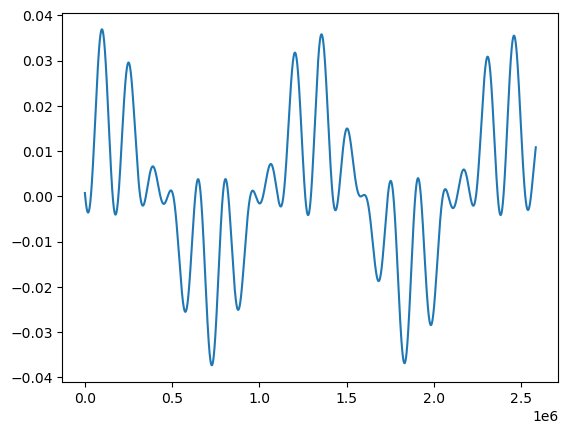

In [73]:
plt.plot(tf, yslr_td[(1,2)].real)

In [60]:
# for time and freq
yslr_fd = Tslr(np.array([1.0]), freq, lambd, beta)

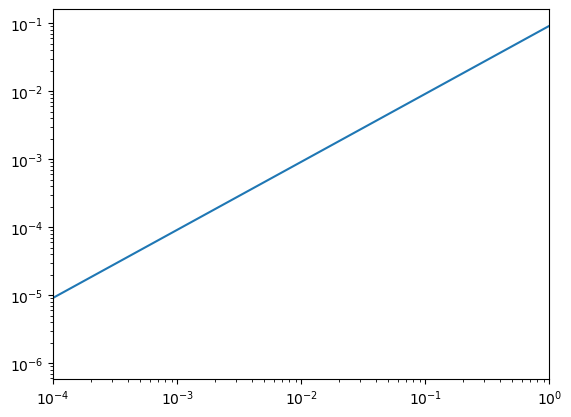

In [61]:
plt.plot(freq, np.abs(yslr_fd[(1,2)]))
plt.xlim(1e-4,1)
plt.xscale('log')
plt.yscale('log')

In [46]:
Tobs = const.YRSID_SI/360
dt = 1
df = 1/Tobs
fmax = 1/(2*dt)

Nsample = int(Tobs/dt)

freq = np.arange(1,Nsample+1) * df

Omega_f0 = 1e-12
Sh = Omega_f0 * freq/freq

In [47]:
sigma = (0.5 * Sh/df/4/np.pi/192)**0.5

hf = np.array([np.random.normal(0, sig, 192) for sig in sigma])

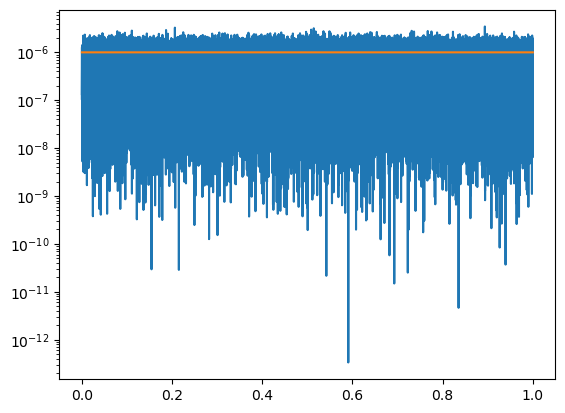

In [54]:
plt.plot(freq, np.abs(hf[:, 0]) *np.sqrt(df * 4*np.pi*192 ))

plt.plot(freq, np.sqrt(Sh))

plt.yscale('log')

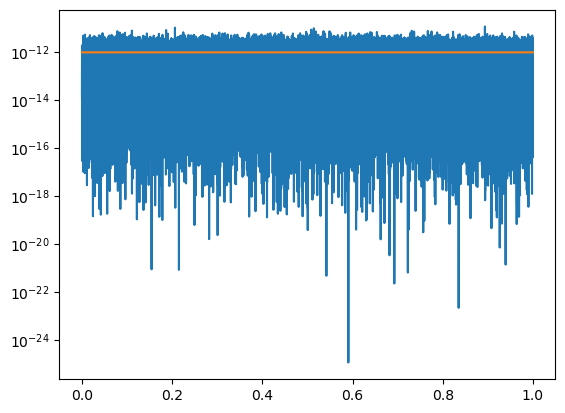

In [50]:
plt.plot(freq, hf[:, 0]*np.conjugate(hf[:,0]) *df * 4*np.pi*192 )

plt.plot(freq, Sh)

plt.yscale('log')

In [8]:
xx.shape

(4, 5)